In [1]:
import pprint
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
pd.set_option( 'display.max_columns', 10 )
pd.set_option('precision', 6)
pd.set_option('max_colwidth', 20)
pd.set_option('display.width', 120)

path = 'C:\\Users\\sophia.yue\\Data\\'
df = pd.read_csv(path + 'bank-full.csv', sep=';')
df.head()
df.shape
df.describe()
df.info()
#  Examine target values and map to 0 and 1
df.y.value_counts()             
targ_dict = {'no': 0, 'yes':1 }
df['target'] = [targ_dict[yy] for yy in df.y]
df.target.value_counts()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


0    39922
1     5289
Name: target, dtype: int64

In [3]:
df.dtypes[df.dtypes == 'O']

job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
month        object
poutcome     object
y            object
dtype: object

In [4]:
df.dtypes[df.dtypes != 'O']

age         int64
balance     int64
day         int64
duration    int64
campaign    int64
pdays       int64
previous    int64
target      int64
dtype: object

In [5]:
df.head()

,age,job,marital,education,default,...,pdays,previous,poutcome,y,target
0,58,management,married,tertiary,no,...,-1,0,unknown,no,0
1,44,technician,single,secondary,no,...,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,...,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,...,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,...,-1,0,unknown,no,0


## function infValue

In [6]:
def infValue( x, y, labels=(0,1), names=('Neg', 'Pos'), mins=(1,1), offsets=(0,0), verb=False ):
 
    a  = pd.crosstab( x, y ) 
    labs2keep=[g for g in a.columns if g in labels ]
    a = a[labs2keep]
    a.columns = names
    
    if sum(offsets) > 0 :
        a = a + offsets
    
    #  Create column containing Column Percentages
    pct_cols = ['Pct_'+b for b in a.columns]
    for i in range(len(a.columns)):
        a[pct_cols[i]]=a[a.columns[i]]/sum(a[a.columns[i]])
    
    a['use']       = np.where( np.logical_and( a[a.columns[0]] > mins[0], a[a.columns[1]] > mins[1]), 1, 0)
    a['woe']       = np.where( a['use'] == 1, np.log(a[a.columns[len(names)]]/a[a.columns[len(names)+1]]), 0)
    a['ivcontrib'] = (a[a.columns[len(names)]]-a[a.columns[len(names)+1]]) * a['woe' ]
  
    inf_val = sum( a['ivcontrib'] )
    
    if verb:
        print('Inf. value = '+ str(inf_val) + ', '+ str(sum(a['use'])) + ' of '+str(len(a['use'])) + ' levels contributing')
        print(a)
        
    return (inf_val, a)


In [7]:
#  Information Value -- Categorical fields
(iv1, a1) = infValue( df['education'], df['target'], verb=True, mins=(1000,300), names=('No_Deposit','Deposit') )
(iv2, a2) = infValue( df['job'],       df['target'], verb=True, mins=( 500,100), names=('No_Deposit','Deposit') )
(iv3, a3) = infValue( df['contact'],   df['target'], verb=True, mins=( 500,100), names=('No_Deposit','Deposit') )
(iv4, a4) = infValue( df['poutcome'],  df['target'], verb=True, mins=( 500,100), names=('No_Deposit','Deposit') )

ivdict1 = {'education': iv1, 'job': iv2, 'contact': iv3, 'poutcome': iv4}
pprint.pprint(ivdict1)

Inf. value = 0.048847821685902536, 3 of 4 levels contributing
           No_Deposit  Deposit  Pct_No_Deposit  Pct_Deposit  use       woe  ivcontrib
education                                                                            
primary          6260      591        0.156806     0.111741    1  0.338821   0.015269
secondary       20752     2450        0.519814     0.463226    1  0.115256   0.006522
tertiary        11305     1996        0.283177     0.377387    1 -0.287198   0.027057
unknown          1605      252        0.040203     0.047646    0  0.000000  -0.000000
Inf. value = 0.1556966120049305, 11 of 12 levels contributing
               No_Deposit  Deposit  Pct_No_Deposit  Pct_Deposit  use       woe  ivcontrib
job                                                                                      
admin.               4540      631        0.113722     0.119304    1 -0.047922   0.000268
blue-collar          9024      708        0.226041     0.133863    1  0.523901   0.048292


In [8]:
(iv3, a3) = infValue( df['contact'],   df['target'], verb=False, mins=( 500,400), names=('No_Deposit','Deposit') )
a3



,No_Deposit,Deposit,Pct_No_Deposit,Pct_Deposit,use,woe,ivcontrib
contact,,,,,,,
cellular,24916,4369,0.624117,0.826054,1,-0.280322,0.056607
telephone,2516,390,0.063023,0.073738,0,0.000000,-0.000000
unknown,12490,530,0.312860,0.100208,1,1.138508,0.242106


In [9]:

plt.plot(a7['woe'])



NameError: name 'a7' is not defined

In [ ]:
a3


In [ ]:
ivdict1

## infValue Simulation

In [ ]:

#def ainfValue( x, y, labels=(0,1), names=('Neg', 'Pos'), mins=(1,1), offsets=(0,0), verb=False ):
x = df['education']
y = df['target']
labels=(0,1); offsets=(0,0)
verb=True; mins=(1000,300); names=('No_Deposit','Deposit') 

a  = pd.crosstab( x, y ) #type: pandas.core.frame.DataFrame 
labs2keep=[g for g in a.columns if g in labels ]
a = a[labs2keep]
a.columns = names

if sum(offsets) > 0 :
    a = a + offsets

#  Create column containing Column Percentages
pct_cols = ['Pct_'+b for b in a.columns]
for i in range(len(a.columns)):
    a[pct_cols[i]]=a[a.columns[i]]/sum(a[a.columns[i]])

a['use']       = np.where( np.logical_and( a[a.columns[0]] > mins[0], a[a.columns[1]] > mins[1]), 1, 0)
a['woe']       = np.where( a['use'] == 1, np.log(a[a.columns[len(names)]]/a[a.columns[len(names)+1]]), 0)
a['ivcontrib'] = (a[a.columns[len(names)]]-a[a.columns[len(names)+1]]) * a['woe' ]
inf_val = sum( a['ivcontrib'] )

if verb:
    print('Inf. value = '+ str(inf_val) + ', '+ str(sum(a['use'])) + ' of '+str(len(a['use'])) + ' levels contributing')
    print(a)
#return (inf_val, a)    

## infValue  wip

In [ ]:
ax  = pd.crosstab( x, y ) #type: pandas.core.frame.DataFrame 
ax.columns
ax
[g for g in ax.columns if g in labels ]

In [ ]:
ax  = pd.crosstab( x, y ) #type: pandas.core.frame.DataFrame 
ax.columns


labs2keep=[g for g in ax.columns if g in labels ]   # [0, 1]
ax = ax[labs2keep]
ax.columns = names
ax

In [ ]:
type(df[(df.education == 'primary') & (df.target == 0)].count())  # series
df[(df.education == 'primary') & (df.target == 0)].count()[0:1]  # 6260 0bs with (education == 'primary') & (df.target == 0)
df[(df.education == 'primary') & (df.target == 1)].count()[0:1]  # age: 591 1ith (education == 'primary') & (df.target == 1)

In [ ]:
df[(df.education == 'primary') & (df.target == 0)].count()  # 6260
df[(df.education == 'primary') & (df.target == 1)].count()  # 591

In [ ]:
a.head()

In [ ]:
 a.columns

In [ ]:
labels=(0,1)
labs2keep=[g for g in a.columns if g in labels ]
labs2keep[0:10]
a.columns = names
a

In [ ]:
 ax[ax.columns[0]] 

In [ ]:
 ax[ax.columns[1]] 

In [ ]:
# 1len(names) # 2
ax[ax.columns[len(names)]] # 0.156806, 0.519814, 0.283177, 0.040203
ax[ax.columns[len(names) + 1]] # 0.11741,  0.463226, 0.377387,  0.04764 
np.log(0.156806/ 0.11741)# 0.2893372898482112 Woe

# 0.156806	0.111741	 0.338821	

In [ ]:
ax[ax.columns[len(names) + 1]]

In [ ]:
ax['use']       = np.where( np.logical_and( ax[ax.columns[0]] > mins[0], ax[ax.columns[1]] > mins[1]), 1, 0)
ax['use'] # 1, 1, 1, 0
ax['woe']       = np.where( ax['use'] == 1, np.log(a[a.columns[len(names)]]/a[a.columns[len(names)+1]]), 0)
ax['woe']
#ax['ivcontrib'] = (ax[ax.columns[len(names)]]-ax[ax.columns[len(names)+1]]) * ax['woe' ]

In [ ]:
#  Create column containing Column Percentages
pct_cols = ['Pct_'+b for b in a.columns]
for i in range(len(ax.columns)):
    ax[pct_cols[i]]=ax[ax.columns[i]]/sum(ax[ax.columns[i]])
a    

In [ ]:
inf_value( df['education'], df['target'], verb=True, mins=(1000,300), names=('No_Deposit','Deposit') )

## Calculate WOE from cross_tab 

In [40]:
def inf_value( a , verb=False ):
    mins=(1,1) 

    names = a.columns
    #  Create column containing Column Percentages
    pct_cols = ['Pct_'+b for b in a.columns]
    # pctx_cols = ['Pctx_'+b for b in a.columns]
    for i in range(len(a.columns)):
        a[pct_cols[i]]=a[a.columns[i]]/sum(a[a.columns[i]])
        #a[pctx_cols[i]]=(100 * a[a.columns[i]]/sum(a[a.columns[i]])).round(1).astype(str)+ '%'
    
    a['use']       = np.where( np.logical_and( a[a.columns[0]] > mins[0], a[a.columns[1]] > mins[1]), 1, 0)
    a['woe']       = np.where( a['use'] == 1, np.log(a[a.columns[len(names)]]/a[a.columns[len(names)+1]]), 0)
    a['ivcontrib'] = (a[a.columns[len(names)]]-a[a.columns[len(names)+1]]) * a['woe' ]
  
   
    a['pct_total'] = (a.Passed + a.Failed)/(a['Passed'].sum() + a.Failed.sum() )
    inf_val = sum( a['ivcontrib'] )
    if verb:
        print('Inf. value = '+ str(inf_val) + ', '+ str(sum(a['use'])) + ' of '+str(len(a['use'])) + ' levels contributing')
        print(a)
        
    return (inf_val, a)

In [11]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

In [44]:

path_file = "C:\\Users\\sophia.yue\\Infosys\\Sandeep Project\\wip Payment Audit Modeling 20180130 v1.xlsx"
df = pd.read_excel(path_file, engine = 'openpyxl', sheet_name = 'WoE_wip', index_col ='Value')
dfx = df.copy()

In [45]:
df.head()

,Failed,Passed
Value,,
USD,3245,7868
CNY,757,6702
EUR,678,4026
INR,207,3343
SGD,171,2274


In [58]:
df = dfx.copy()
(inf, dfy) = inf_value( df , verb=True )

Inf. value = 0.5570889097855005, 27 of 27 levels contributing
       Failed  Passed  Pct_Failed  Pct_Passed  use       woe     ivcontrib  pct_ total
Value                                                                                 
USD      3245    7868    0.542551    0.227781    1  0.867900  2.731894e-01    0.274239
CNY       757    6702    0.126567    0.194025    1 -0.427210  2.881838e-02    0.184068
EUR       678    4026    0.113359    0.116554    1 -0.027793  8.879320e-05    0.116082
INR       207    3343    0.034610    0.096781    1 -1.028317  6.393163e-02    0.087605
SGD       171    2274    0.028591    0.065833    1 -0.834044  3.106177e-02    0.060336
GBP       157    1214    0.026250    0.035146    1 -0.291842  2.596176e-03    0.033833
AUD       147    1504    0.024578    0.043541    1 -0.571863  1.084444e-02    0.040742
CAD        79    1084    0.013208    0.031382    1 -0.865377  1.572701e-02    0.028700
KRW        69     400    0.011537    0.011580    1 -0.003770  1.6426

In [47]:
df.head()

,Failed,Passed,Pct_Failed,Pct_Passed,use,woe,ivcontrib,pct_ total
Value,,,,,,,,
USD,3245,7868,0.542551,0.227781,1,0.867900,0.273189,0.274239
CNY,757,6702,0.126567,0.194025,1,-0.427210,0.028818,0.184068
EUR,678,4026,0.113359,0.116554,1,-0.027793,0.000089,0.116082
INR,207,3343,0.034610,0.096781,1,-1.028317,0.063932,0.087605
SGD,171,2274,0.028591,0.065833,1,-0.834044,0.031062,0.060336


In [36]:
df['pct_ total'] = (df.Passed + df.Failed)/(df['Passed'].sum() + df.Failed.sum() )

In [37]:
df.head()

,Failed,Passed,Pct_Failed,Pct_Passed,use,woe,ivcontrib,pct_ total
Value,,,,,,,,
USD,3245,7868,0.542551,0.227781,1,0.867900,0.273189,0.274239
CNY,757,6702,0.126567,0.194025,1,-0.427210,0.028818,0.184068
EUR,678,4026,0.113359,0.116554,1,-0.027793,0.000089,0.116082
INR,207,3343,0.034610,0.096781,1,-1.028317,0.063932,0.087605
SGD,171,2274,0.028591,0.065833,1,-0.834044,0.031062,0.060336


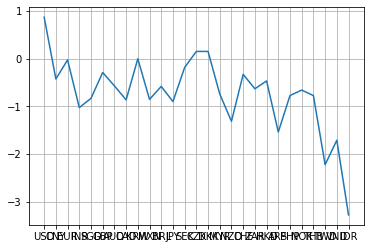

In [48]:

plt.plot( df.woe); plt.grid()

In [59]:
dfz = df.iloc[0:6, :]
dfz

,Failed,Passed,Pct_Failed,Pct_Passed,use,woe,ivcontrib,pct_ total
Value,,,,,,,,
USD,3245,7868,0.542551,0.227781,1,0.867900,0.273189,0.274239
CNY,757,6702,0.126567,0.194025,1,-0.427210,0.028818,0.184068
EUR,678,4026,0.113359,0.116554,1,-0.027793,0.000089,0.116082
INR,207,3343,0.034610,0.096781,1,-1.028317,0.063932,0.087605
SGD,171,2274,0.028591,0.065833,1,-0.834044,0.031062,0.060336
GBP,157,1214,0.026250,0.035146,1,-0.291842,0.002596,0.033833


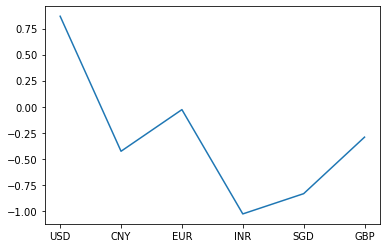

In [60]:
plt.plot( dfz.woe);

<AxesSubplot:>

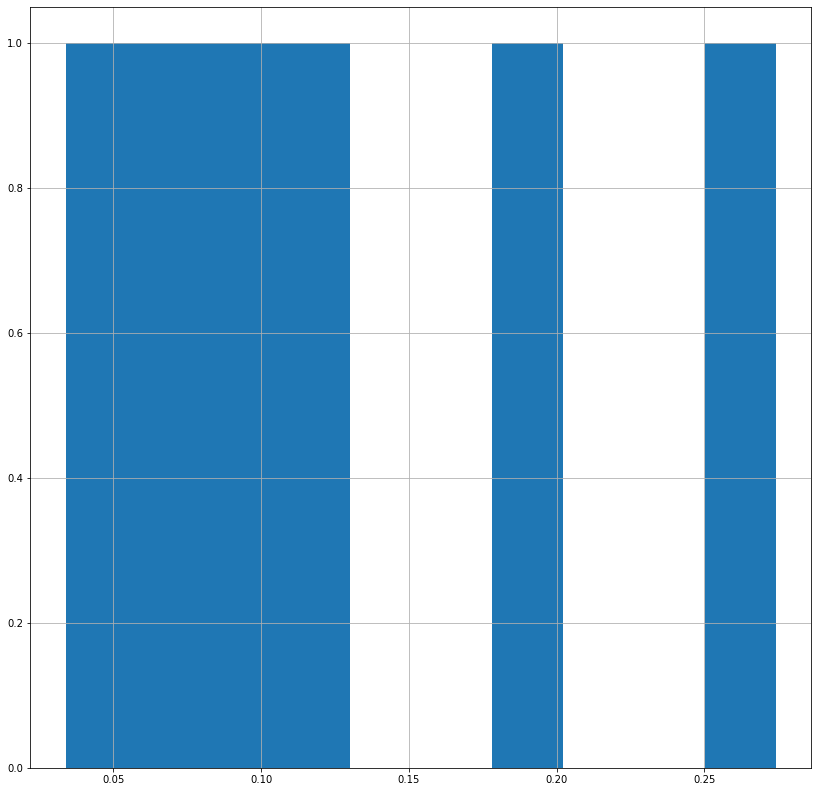

In [65]:
#dfz.pct_total.hist(figsize = (14, 14))
dfz['pct_ total'].hist(figsize = (14, 14))
#dfz.woe.hist(figsize = (14, 14));

In [62]:
dfz

,Failed,Passed,Pct_Failed,Pct_Passed,use,woe,ivcontrib,pct_ total
Value,,,,,,,,
USD,3245,7868,0.542551,0.227781,1,0.867900,0.273189,0.274239
CNY,757,6702,0.126567,0.194025,1,-0.427210,0.028818,0.184068
EUR,678,4026,0.113359,0.116554,1,-0.027793,0.000089,0.116082
INR,207,3343,0.034610,0.096781,1,-1.028317,0.063932,0.087605
SGD,171,2274,0.028591,0.065833,1,-0.834044,0.031062,0.060336
GBP,157,1214,0.026250,0.035146,1,-0.291842,0.002596,0.033833


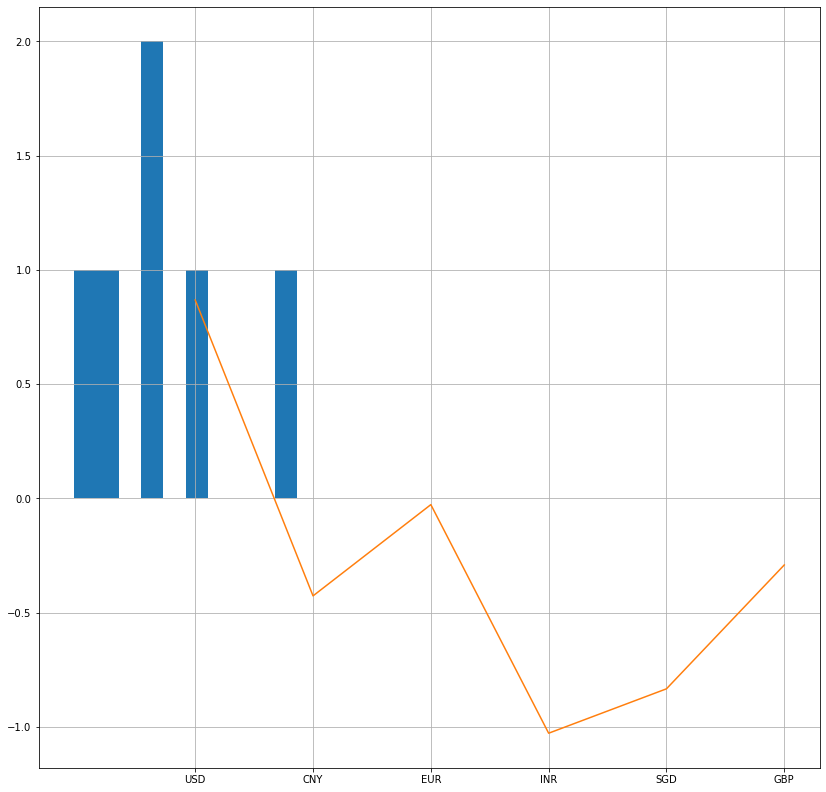

In [53]:
dfz.woe.hist(figsize = (14, 14)); plt.plot( dfz.woe);

In [ ]:
ax = dfz.plot.bar(x='lab', y='val', rot=0)

In [ ]:
np.log( a0.227781/0.542551)

In [ ]:
np.log( 0.542551/0.227781 )

In [34]:
df['Passed'].sum()

34542

In [56]:
dfz

,Failed,Passed,Pct_Failed,Pct_Passed,use,woe,ivcontrib,pct_ total
Value,,,,,,,,
USD,3245,7868,0.542551,0.227781,1,0.867900,0.273189,0.274239
CNY,757,6702,0.126567,0.194025,1,-0.427210,0.028818,0.184068
EUR,678,4026,0.113359,0.116554,1,-0.027793,0.000089,0.116082
INR,207,3343,0.034610,0.096781,1,-1.028317,0.063932,0.087605
SGD,171,2274,0.028591,0.065833,1,-0.834044,0.031062,0.060336
GBP,157,1214,0.026250,0.035146,1,-0.291842,0.002596,0.033833


In [ ]:



Analytics Testing	6151 CRS RFP Business Requirement Document	
What platform is used to build the predictive models ? Eg: AWS, SAS, Azure, Python etc
what type of predictive models are built and what is the volume of the models?
Are there any existing CI/CD , ML ops pipelines existing?
Will the analytics testing team be redeveloping any models?
will the analytics testing team be responsible for improving the model accuracy?
will the analytics testing team be responsible for development of challenger models?
what level of domain expertise is required by testing team in the area of risk and compliance?
Analytics testing includes testing the data on SaS reports by comparing data with source DB tables, Please confirm if our understanding is correct?
Is there any scope for DB testing, batch testing that loads data in the databases?
QA team to perform test plan and test results review, any further quality control processes are expected from QA team?
Security testing to be considered in scope?
QA team is expected to have SQL and DB knowledge as well as SAS reports testing skills to do this job, any other skill is required?